In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
from matplotlib import pyplot as plt
from scipy import ndimage

### Generating a PHI FDT distortion model with a max of 2% at the side of the image [-1,0]
*cal_unit* takes as arguments: [alpha, delta, theta] where

-    alpha == off set of the polarizer(angle)
-    delta == retardance of retarder
-    theta == off set of the retarder 

In [3]:
def n_coord(x,y,d=1):
    w,h = x.shape
    assert w,h == y.shape
    if d ==1:
        print('Normalizing')
        return (2*x-w)/w, (2*y-h)/h
    if d ==-1:
        print('De-Normalizing')
        return (x+1)*w / 2 , (y+1)*h/2
    print('wrong direction')
    return 0,0
def dmodel(r,k1,k2):
    '''r is a map of the grid'''
    return 1 + k1*r + k2*r**2
def cmesh(w,h,**kwargs):
    X,Y = np.meshgrid(np.arange(w),np.arange(h))
    x,y = n_coord(X,Y,**kwargs)
    r = np.sqrt(x**2 + y**2) 
    return x,y,r

    

In [4]:
# adjust k_1 and k_2 to achieve the required distortion
k1 = 0.02
k2 = 0.02
margin = np.max([k1,k2])*4+1
w,h = 2048,2048
wn,hn = int(np.round(w*margin)),int(np.round(h*margin))
print(w,h)
x,y,r = cmesh(wn,hn)
model = dmodel(r,k1,k2)

2048 2048
Normalizing


In [5]:
#the model is applied like
x_new = x * model
y_new = y * model
x_new2, y_new2 = n_coord(x_new,y_new,d=-1)

De-Normalizing


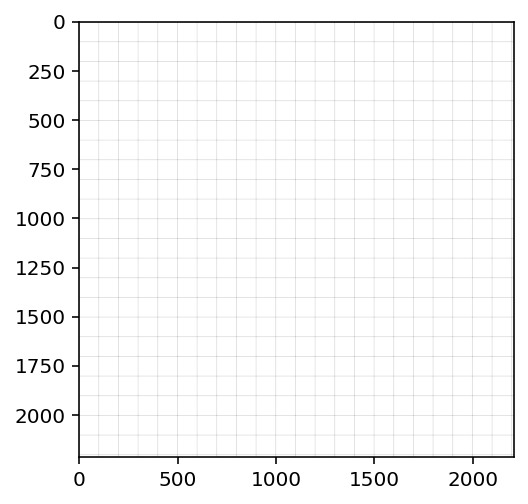

In [6]:
m = np.zeros((wn,hn))
for xi in range(wn):
    for yi in range(hn):
        if (np.floor(xi) % 100) != 0:
            if (np.floor(yi) % 100) != 0:
                m[xi][yi]= 1
            else:
                m[xi][yi]= 0

plt.imshow(m,cmap='Greys_r')

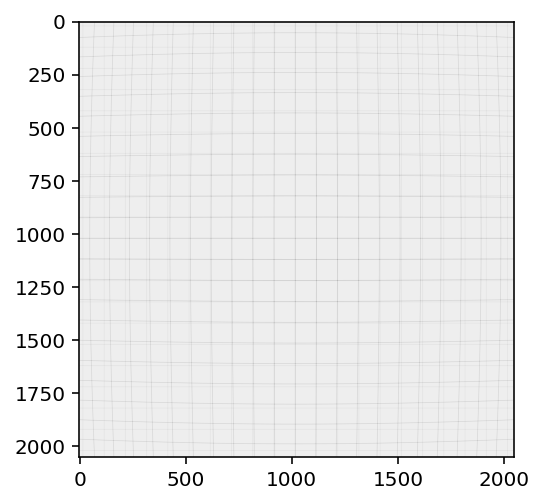

In [7]:
grid = ndimage.map_coordinates(m, [y_new2.ravel(),x_new2.ravel()])
grid_shape = m.shape
grid = np.reshape(grid,(wn,hn))
yi = int(np.round(grid_shape[1]-h)/2)
yf = yi + h + 1
xi = int(np.round(grid_shape[0]-w)/2)
xf = xi + w + 1

plt.imshow(m[yi:yf,xi:xf],cmap='Greys_r',alpha=0.5)
#plt.show()
plt.imshow(grid[yi:yf,xi:xf],cmap='Greys_r',alpha=0.5)
plt.show()


In [118]:
int(np.round(grid_shape[1]-h)/2)

82